First 5 rows of the dataset:
  CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0      C0001    Male              0     Yes         No       1          Yes   
1      C0002  Female              1      No        Yes       2          Yes   
2      C0003    Male              0     Yes         No       3          Yes   
3      C0004  Female              1      No        Yes       4          Yes   
4      C0005    Male              0     Yes         No       5          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0                No             DSL                   No  ...   
1               Yes     Fiber optic                  Yes  ...   
2  No phone service              No  No internet service  ...   
3                No             DSL                   No  ...   
4               Yes     Fiber optic                  Yes  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0                   No               

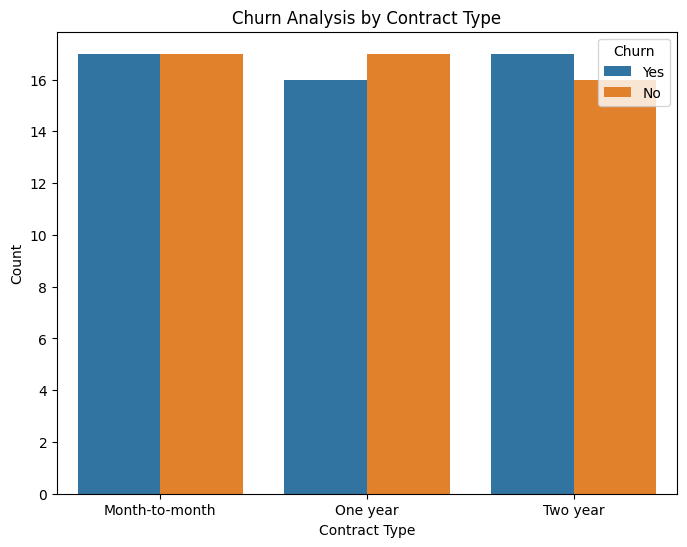

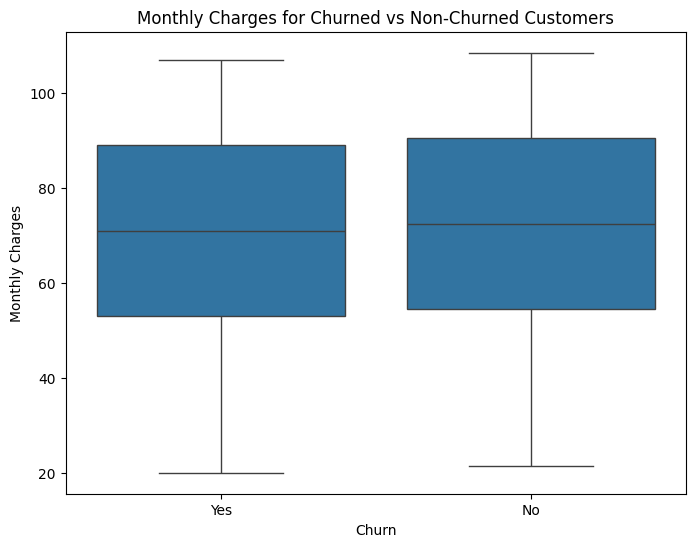

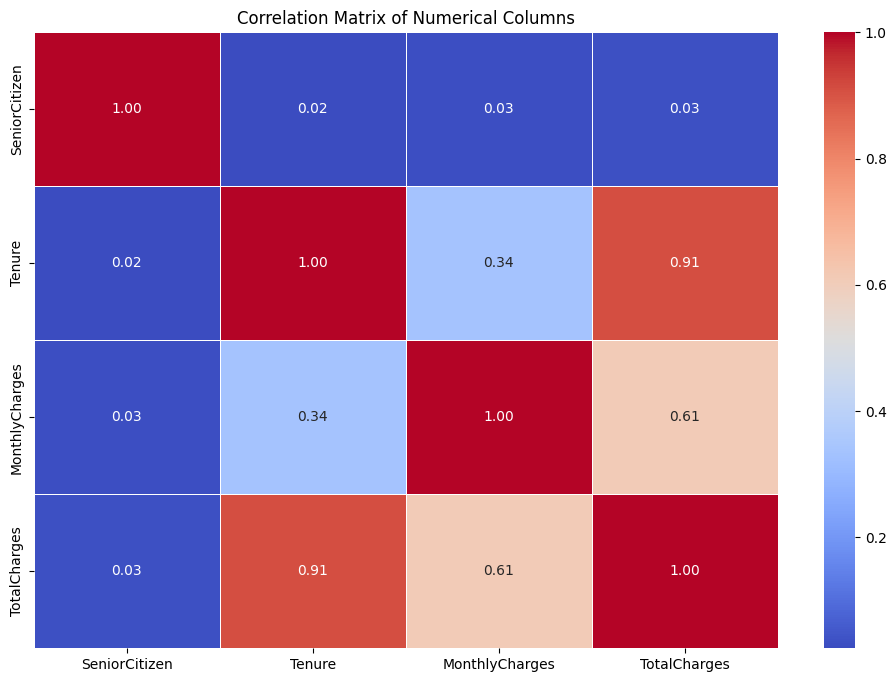


Value counts for CustomerID:
CustomerID
C0001    1
C0002    1
C0003    1
C0004    1
C0005    1
        ..
C0096    1
C0097    1
C0098    1
C0099    1
C0100    1
Name: count, Length: 100, dtype: int64

Value counts for Gender:
Gender
Male      50
Female    50
Name: count, dtype: int64

Value counts for Partner:
Partner
Yes    50
No     50
Name: count, dtype: int64

Value counts for Dependents:
Dependents
No     50
Yes    50
Name: count, dtype: int64

Value counts for PhoneService:
PhoneService
Yes    80
No     20
Name: count, dtype: int64

Value counts for MultipleLines:
MultipleLines
No                  34
Yes                 33
No phone service    33
Name: count, dtype: int64

Value counts for InternetService:
InternetService
DSL            34
Fiber optic    33
No             33
Name: count, dtype: int64

Value counts for OnlineSecurity:
OnlineSecurity
No                     34
Yes                    33
No internet service    33
Name: count, dtype: int64

Value counts for OnlineBacku

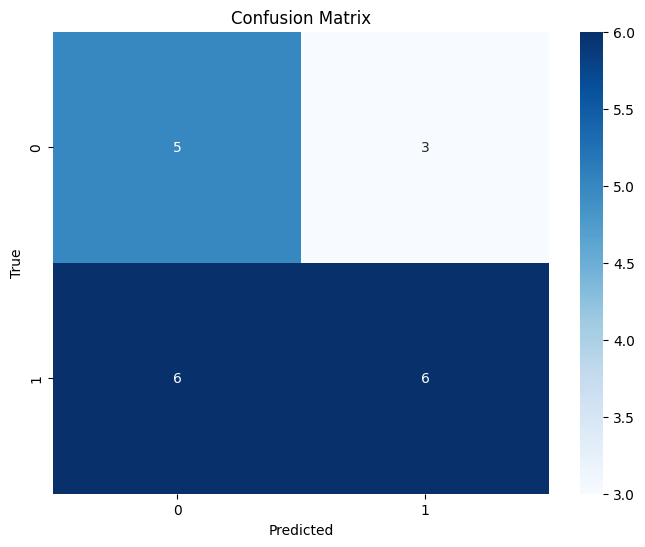

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('telco.csv')

print("First 5 rows of the dataset:")
print(df.head())

missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

print("\nSummary statistics for numerical columns:")
print(df.describe())

print("\nData Types of Columns:")
print(df.dtypes)

# Replaced 'Churn Label' with 'Churn'
churned_customers = df[df['Churn'] == 'Yes']
print(f"\nNumber of churned customers: {len(churned_customers)}")
print(f"Churn rate: {len(churned_customers) / len(df) * 100:.2f}%")

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Analysis by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')  # Replaced 'Monthly Charge' with 'MonthlyCharges'
plt.title('Monthly Charges for Churned vs Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

# Removed the 'Satisfaction' and 'Age' references from the plots
# No need for the 'Age Group' creation either

for column in categorical_columns:
    print(f"\nValue counts for {column}:")
    print(df[column].value_counts())

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])  # Replaced 'Churn Label' with 'Churn'
df['Contract'] = label_encoder.fit_transform(df['Contract'])
df['PaymentMethod'] = label_encoder.fit_transform(df['PaymentMethod'])

# Commented out the 'Offer' encoding part, as it's causing the KeyError.
# If 'Offer' is not a column in the dataset, you can remove this part.
# df['Offer'] = label_encoder.fit_transform(df['Offer'])

# Removed 'Age' from the features list
features = ['Tenure', 'MonthlyCharges', 'Contract', 'PaymentMethod']  # Removed 'Age' and 'Satisfaction'
target = 'Churn'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()